In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

# Code Louisville Final Project

## Investigating The Correlation Between Crime and Greenery/Green Space in Louisville, Ky Zip Codes

In [2]:
# importing Louisville Metro KY - Urban Heat Island Neighborhood Data
urban_heat_df = pd.read_csv('data/Louisville_Metro_KY_-_Urban_Heat_Island_Neighborhood_Data.csv', index_col='ObjectId')
urban_heat_df

,Neighborhood,Total_New_Green_Roofs,Total_Grass_Planted__Hectares_,Total_Trees_Planted,Total_Cool_Paving__Hectacres_,Total_New_Cool_Roofs,ZIP_CODE
ObjectId,,,,,,,
1,Hurstbourne Acres,0,7,1481,54,99,40220.0
2,Industrial East,0,9,3148,62,588,NaN
3,Industrial West,10,66,3974,177,494,NaN
4,Irish Hill,10,4,1464,30,73,40204.0
5,Iroquois,2,4,808,15,10,40214.0
...,...,...,...,...,...,...,...
127,Hills And Dales,0,1,60,3,0,40241.0
128,Hollow Creek,0,7,502,19,9,40228.0
129,Hollyvilla,0,3,144,10,9,40118.0


In [3]:
# Check for null values
urban_heat_df.isna().sum()

Neighborhood                      0
Total_New_Green_Roofs             0
Total_Grass_Planted__Hectares_    0
Total_Trees_Planted               0
Total_Cool_Paving__Hectacres_     0
Total_New_Cool_Roofs              0
ZIP_CODE                          3
dtype: int64

In [4]:
# Drop all of the rows with null values
urban_heat_df = urban_heat_df.dropna()
urban_heat_df

,Neighborhood,Total_New_Green_Roofs,Total_Grass_Planted__Hectares_,Total_Trees_Planted,Total_Cool_Paving__Hectacres_,Total_New_Cool_Roofs,ZIP_CODE
ObjectId,,,,,,,
1,Hurstbourne Acres,0,7,1481,54,99,40220.0
4,Irish Hill,10,4,1464,30,73,40204.0
5,Iroquois,2,4,808,15,10,40214.0
6,Iroquois Park,0,6,1016,29,9,40214.0
7,Jacobs,0,10,1787,52,58,40215.0
...,...,...,...,...,...,...,...
127,Hills And Dales,0,1,60,3,0,40241.0
128,Hollow Creek,0,7,502,19,9,40228.0
129,Hollyvilla,0,3,144,10,9,40118.0


In [5]:
# Drop the columns that are not needed
urban_heat_df_cleaned = urban_heat_df.drop(columns=["Total_Cool_Paving__Hectacres_", "Total_New_Cool_Roofs"])
# Changed the zip_code column to integers
urban_heat_df_cleaned["ZIP_CODE"] = urban_heat_df_cleaned["ZIP_CODE"].astype(int)
urban_heat_df_cleaned["ZIP_CODE"]

ObjectId
1      40220
4      40204
5      40214
6      40214
7      40215
       ...  
127    40241
128    40228
129    40118
130    40220
131    40222
Name: ZIP_CODE, Length: 128, dtype: int32

In [6]:
# importing Louisville Metro KY - Crime Data 2022
crime_data_df = pd.read_csv('data/Louisville_Metro_KY_-_Crime_Data_2022.csv', index_col="ObjectId", low_memory=False)
crime_data_df

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,BADGE_ID,CRIME_TYPE,UOR_DESC,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,City,ZIP_CODE
ObjectId,,,,,,,,,,,,,,,
1,80-22-000334,2022/01/02 16:49:00,2022/01/02 15:49:00,5276,DRUGS/ALCOHOL VIOLATIONS,POSS CONT SUB-1ST DEGREE-1ST OFFENSE-HEROIN,35A,PART II,COMPLETED,6TH DIVISION,625,RESTAURANT,3400 BLOCK BARDSTOWN RD ...,LOUISVILLE,40218
2,80-22-000333,2022/01/02 18:14:00,2022/01/02 18:00:00,5363,BURGLARY,BURGLARY - 2ND DEGREE,220,PART I,COMPLETED,6TH DIVISION,624,OTHER RESIDENCE (APARTMENT/CONDO),4300 BLOCK NEWPORT RD ...,LOUISVILLE,40218
3,80-22-000335,2022/01/02 18:37:00,2022/01/01 21:00:00,8063,THEFT/LARCENY,TBUT OR DISP FIREARM,23H,PART I,COMPLETED,4TH DIVISION,424,HIGHWAY / ROAD / ALLEY,4000 BLOCK SOUTHERN PKY ...,LOUISVILLE,40214
4,80-22-000336,2022/01/02 18:31:00,2022/01/02 18:14:00,7381,OTHER,DOMESTIC ABUSE DUTIES OF LAW ENFORCEMENT,90Z,PART II,COMPLETED,2ND DIVISION,223,OTHER RESIDENCE (APARTMENT/CONDO),1400 BLOCK BEECH ST ...,LOUISVILLE,40211
5,80-22-000338,2022/01/02 18:51:00,2022/01/02 18:20:00,8063,THEFT/LARCENY,"TBUT OR DISP SHOPLIFTING $500 < $1,000",23C,PART I,COMPLETED,3RD DIVISION,323,DEPARTMENT / DISCOUNT STORE,100 BLOCK OUTER LOOP ...,LOUISVILLE,40214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71502,80-23-500158,2022/12/24 10:15:00,2022/12/24 09:36:00,8375,THEFT/LARCENY,TBUT OR DISP SHOPLIFTING,23C,PART I,COMPLETED,3RD DIVISION,331,DRUG STORE/DR`S OFFICE/HOSPITAL,4900 BLOCK CANE RUN RD ...,LOUISVILLE,40216
71503,80-23-500159,2022/12/24 15:38:00,2022/12/20 09:00:00,8375,THEFT/LARCENY,THEFT OF MAIL MATTER,23H,PART I,COMPLETED,1ST DIVISION,134,HOTEL / MOTEL / ETC.,100 BLOCK E WASHINGTON ST ...,LOUISVILLE,40202
71504,80-23-500160,2022/12/25 14:06:00,2022/12/25 09:00:00,8375,VANDALISM,CRIMINAL MISCHIEF-3RD DEGREE,290,PART II,COMPLETED,1ST DIVISION,112,RESIDENCE / HOME,600 BLOCK DR W J HODGE ST ...,LOUISVILLE,40203


In [7]:
# Drop all of the unnecessary columns
crime_data_df = crime_data_df.drop(columns=["INCIDENT_NUMBER", "DATE_REPORTED", "DATE_OCCURED", "BADGE_ID", "UOR_DESC", "NIBRS_CODE", "UCR_HIERARCHY", "ATT_COMP", "LMPD_DIVISION", "LMPD_BEAT", "PREMISE_TYPE", "BLOCK_ADDRESS", "City"])
crime_data_df

,CRIME_TYPE,ZIP_CODE
ObjectId,,
1,DRUGS/ALCOHOL VIOLATIONS,40218
2,BURGLARY,40218
3,THEFT/LARCENY,40214
4,OTHER,40211
5,THEFT/LARCENY,40214
...,...,...
71502,THEFT/LARCENY,40216
71503,THEFT/LARCENY,40202
71504,VANDALISM,40203


In [8]:
# Check for null values
crime_data_df.isna().sum()

CRIME_TYPE     0
ZIP_CODE      31
dtype: int64

In [9]:
# Drop all of the rows with null values and turning the zip_code column into integers
crime_data_df_cleaned = crime_data_df.dropna()
crime_data_df_cleaned = crime_data_df[crime_data_df["ZIP_CODE"].str.len() == 5]
crime_data_df_cleaned.loc[0:]["ZIP_CODE"] = crime_data_df_cleaned["ZIP_CODE"].astype(str).copy()
crime_data_df_cleaned.loc[0:]["ZIP_CODE"] = crime_data_df_cleaned["ZIP_CODE"].str.strip().copy()
crime_data_df_cleaned.loc[0:]['ZIP_CODE'] = pd.to_numeric(crime_data_df_cleaned['ZIP_CODE'], errors='coerce').copy()
print(crime_data_df_cleaned.dtypes)
crime_data_df_cleaned.loc[0:]['ZIP_CODE'] = crime_data_df_cleaned['ZIP_CODE'].fillna(0).copy()
crime_data_df_cleaned['ZIP_CODE'] = crime_data_df_cleaned.copy()['ZIP_CODE'].astype("int32")
crime_data_df_cleaned
print(crime_data_df_cleaned.dtypes)

CRIME_TYPE    object
ZIP_CODE      object
dtype: object
CRIME_TYPE    object
ZIP_CODE       int32
dtype: object


C:\Users\lawre\AppData\Local\Temp\ipykernel_34408\200524295.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data_df_cleaned['ZIP_CODE'] = crime_data_df_cleaned.copy()['ZIP_CODE'].astype("int32")


In [10]:
# Merging the dataframes
merged_df = urban_heat_df_cleaned.merge(crime_data_df_cleaned, on="ZIP_CODE", how="inner")
merged_df

,Neighborhood,Total_New_Green_Roofs,Total_Grass_Planted__Hectares_,Total_Trees_Planted,ZIP_CODE,CRIME_TYPE
0,Hurstbourne Acres,0,7,1481,40220,OTHER
1,Hurstbourne Acres,0,7,1481,40220,ASSAULT
2,Hurstbourne Acres,0,7,1481,40220,VANDALISM
3,Hurstbourne Acres,0,7,1481,40220,ASSAULT
4,Hurstbourne Acres,0,7,1481,40220,ASSAULT
...,...,...,...,...,...,...
259554,Fern Creek,0,51,4831,40291,OTHER
259555,Fern Creek,0,51,4831,40291,THEFT/LARCENY
259556,Fern Creek,0,51,4831,40291,VEHICLE BREAK-IN/THEFT
259557,Fern Creek,0,51,4831,40291,ARSON


In [11]:
# checking for null values and dropping them
merged_df.isna().sum()
merged_df = merged_df.dropna()
merged_df

,Neighborhood,Total_New_Green_Roofs,Total_Grass_Planted__Hectares_,Total_Trees_Planted,ZIP_CODE,CRIME_TYPE
0,Hurstbourne Acres,0,7,1481,40220,OTHER
1,Hurstbourne Acres,0,7,1481,40220,ASSAULT
2,Hurstbourne Acres,0,7,1481,40220,VANDALISM
3,Hurstbourne Acres,0,7,1481,40220,ASSAULT
4,Hurstbourne Acres,0,7,1481,40220,ASSAULT
...,...,...,...,...,...,...
259554,Fern Creek,0,51,4831,40291,OTHER
259555,Fern Creek,0,51,4831,40291,THEFT/LARCENY
259556,Fern Creek,0,51,4831,40291,VEHICLE BREAK-IN/THEFT
259557,Fern Creek,0,51,4831,40291,ARSON


In [46]:
# sorting the dataframe by zip code and crime type
merged_df.sort_values(by=["ZIP_CODE", "CRIME_TYPE"])

,Neighborhood,Total_New_Green_Roofs,Total_Grass_Planted__Hectares_,Total_Trees_Planted,ZIP_CODE,CRIME_TYPE
259558,Glenview,0,4,550,40025,BURGLARY
190148,Prospect,0,27,2144,40059,ARSON
190052,Prospect,0,27,2144,40059,ASSAULT
190053,Prospect,0,27,2144,40059,ASSAULT
190063,Prospect,0,27,2144,40059,ASSAULT
...,...,...,...,...,...,...
64612,Jeffersontown,0,101,15076,40299,WEAPONS
64637,Jeffersontown,0,101,15076,40299,WEAPONS
64641,Jeffersontown,0,101,15076,40299,WEAPONS
64664,Jeffersontown,0,101,15076,40299,WEAPONS


In [27]:
# grouping the dataframe by neighborhood and zip code
base_df = merged_df.groupby(['Neighborhood', 'ZIP_CODE']).agg({
    'CRIME_TYPE': lambda x: x.tolist(),
    'Total_New_Green_Roofs': 'first',
    'Total_Grass_Planted__Hectares_': 'first',
    'Total_Trees_Planted': 'first'
}).reset_index()
base_df

,Neighborhood,ZIP_CODE,CRIME_TYPE,Total_New_Green_Roofs,Total_Grass_Planted__Hectares_,Total_Trees_Planted
0,Airport,40209,"[THEFT/LARCENY, THEFT/LARCENY, MOTOR VEHICLE T...",105,29,3498
1,Algonquin,40210,"[DRUGS/ALCOHOL VIOLATIONS, ASSAULT, ASSAULT, A...",17,12,4118
2,Anchorage,40223,"[OTHER, VEHICLE BREAK-IN/THEFT, ASSAULT, MOTOR...",0,24,1488
3,Auburndale,40214,"[THEFT/LARCENY, THEFT/LARCENY, THEFT/LARCENY, ...",0,6,719
4,Audubon,40213,"[VEHICLE BREAK-IN/THEFT, MOTOR VEHICLE THEFT, ...",0,6,1316
...,...,...,...,...,...,...
120,Wildwood,40207,"[OTHER, MOTOR VEHICLE THEFT, OTHER, FRAUD, THE...",0,1,582
121,Windy Hills,40207,"[OTHER, MOTOR VEHICLE THEFT, OTHER, FRAUD, THE...",0,6,466
122,Woodland Hills,40243,"[MOTOR VEHICLE THEFT, THEFT/LARCENY, VANDALISM...",0,7,1029
123,Worthington Hills,40245,"[ASSAULT, OTHER, THEFT/LARCENY, OTHER, FRAUD, ...",0,6,493


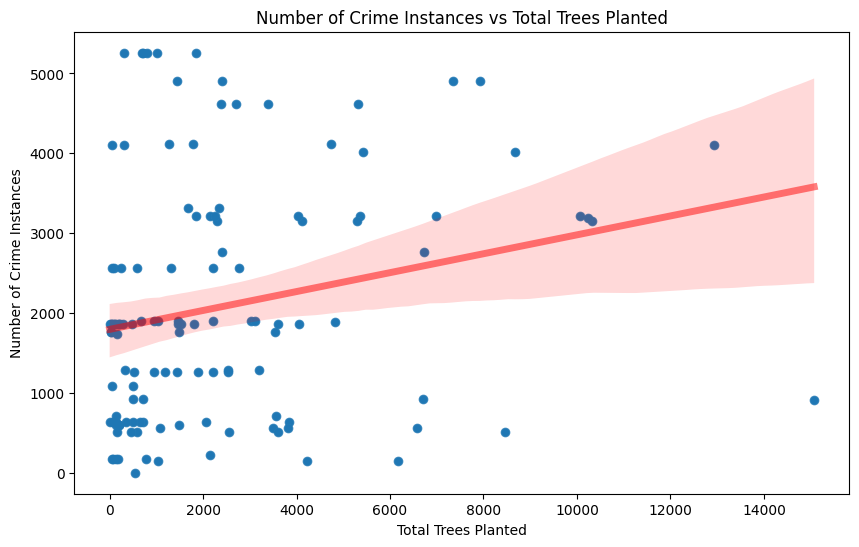

In [23]:
# creating a new column that counts the number of crimes per zip code
base_df["CRIME_COUNT"] = base_df["CRIME_TYPE"].apply(len)

# creating a scatter plot that shows the relationship between crime count and total trees planted in each zip code.
plt.figure(figsize=(10, 6))
sns.scatterplot(x=base_df["Total_Trees_Planted"], y=base_df["CRIME_COUNT"], data=base_df) 
sns.regplot(x=base_df["Total_Trees_Planted"], y=base_df["CRIME_COUNT"], data=base_df, line_kws={"color":"r", "alpha":0.5, "lw":5 })

plt.xlabel("Total Trees Planted")
plt.ylabel("Number of Crime Instances")
plt.title("Number of Crime Instances vs Total Trees Planted")
plt.show()

In [22]:
# using the corr function to find the correlation between the number of crime instances and total trees planted
# this shows a very weak positive correlation between the two variables
correlation = base_df["Total_Trees_Planted"].corr(base_df["CRIME_COUNT"])
correlation

0.2239975566950953

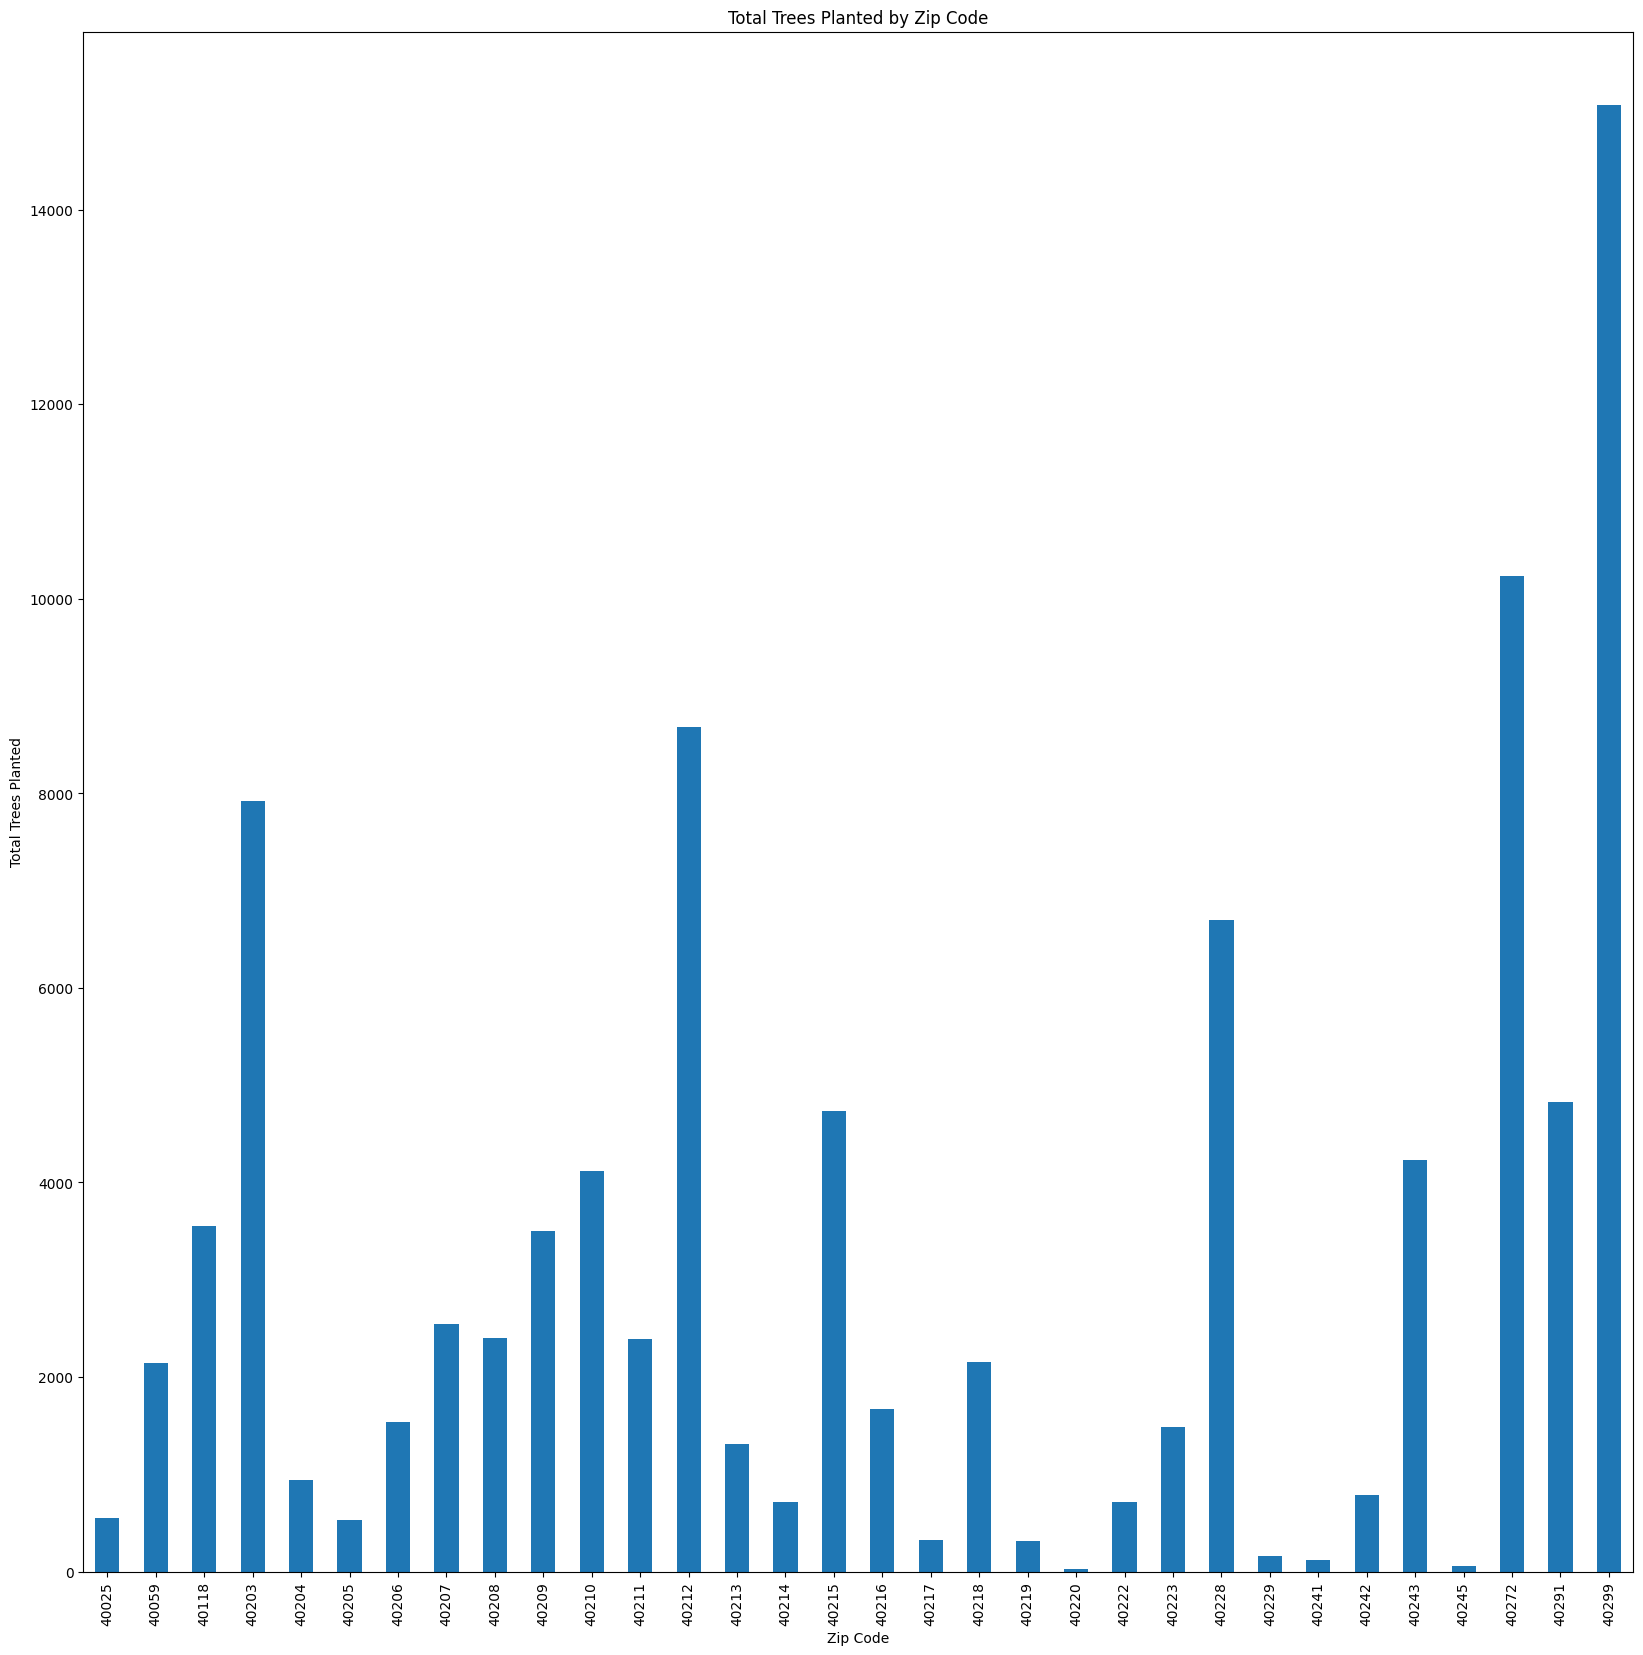

In [20]:
grouped = base_df.groupby("ZIP_CODE")["Total_Trees_Planted"].first()
grouped.plot(kind="bar", figsize=(20, 20))
plt.title("Total Trees Planted by Zip Code")
plt.xlabel("Zip Code")
plt.ylabel("Total Trees Planted")
plt.show()

In [16]:
grouped_df = merged_df.groupby(["ZIP_CODE", "CRIME_TYPE"]).size().reset_index(name="COUNT")
grouped_df

,ZIP_CODE,CRIME_TYPE,COUNT
0,40025,BURGLARY,1
1,40059,ARSON,1
2,40059,ASSAULT,43
3,40059,BURGLARY,18
4,40059,DISTURBING THE PEACE,1
...,...,...,...
447,40299,SEX CRIMES,11
448,40299,THEFT/LARCENY,192
449,40299,VANDALISM,57
450,40299,VEHICLE BREAK-IN/THEFT,139


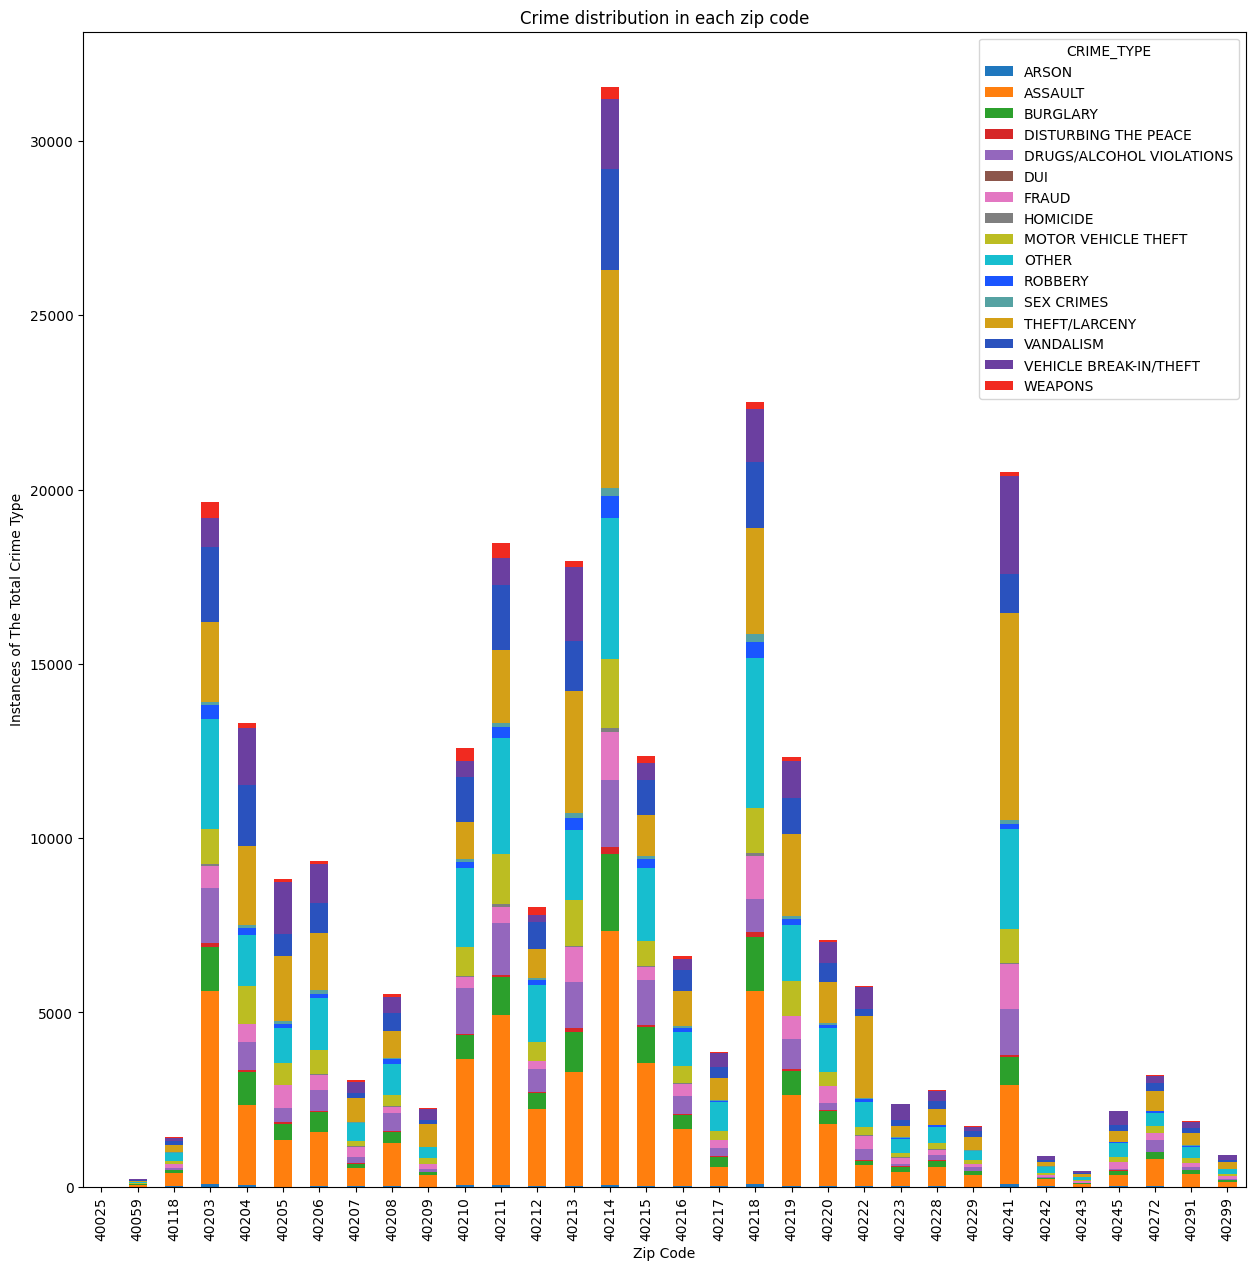

In [48]:
pivot_df = grouped_df.pivot(index="ZIP_CODE", columns="CRIME_TYPE", values="COUNT")
pivot_df.plot(kind="bar", stacked=True, figsize=(15, 15), 
color=[
  "#1f77be", "#ff7f0e", "#2ca02c", "#d62728", 
  "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", 
  "#bcbd22", "#17becf", "#1a55FF", "#55a2a2", 
  "#d4a017", "#2a52be", "#6b3fa0", "#f12a20"
  ])
plt.title("Crime distribution in each zip code")
plt.xlabel("Zip Code")
plt.ylabel("Instances of The Total Crime Type")
plt.show()